# Cymetric Example for materials exchanges

This example walks through how to extract and plot information about materials exchanges in a Cyclus simulation

### Learning Objectives:
* Open an SQLite database with Cymetric
* Store a metric as a pandas DataFrame
* Manipulate the contents and column names of a DataFrame
* Plot the data in a DataFrame in a 

In [1]:
import cymetric as cym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Remove any current database with the same name, run cyclus to have the most updated output database
! rm recycle.sqlite
! cyclus recycle.xml -o recycle.sqlite #-o flag specifies output file name

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj 0 Primal inf 0.011111011 (1)
Clp0006I 1  Obj 10
Clp0000I Optimal - objective value 10
Clp0032I Optimal objective 10 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 10
Cbc0045I Heuristic rounding took 0 seconds (no good)
Clp0000I Optimal - objective value 10
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 10
Clp0006I 0  Obj 10 Primal inf 0.32587783 (2)
Clp0006I 3  Obj 90
Clp0000I Optimal - objective value 90
Clp0000I Optimal - objective value 90
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 90
Clp0006I 0  Obj 90 Primal inf 0.6249998 (2)
Clp0006I 1  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 3, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by roun

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj 0 Primal inf 0.011111011 (1)
Clp0006I 1  Obj 10
Clp0000I Optimal - objective value 10
Clp0032I Optimal objective 10 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 10
Cbc0045I Heuristic rounding took 1e-06 seconds (no good)
Clp0000I Optimal - objective value 10
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 10
Clp0006I 0  Obj 10 Primal inf 0.32587783 (2)
Clp0006I 3  Obj 90
Clp0000I Optimal - objective value 90
Clp0000I Optimal - objective value 90
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 90
Clp0006I 0  Obj 90 Primal inf 0.6249998 (2)
Clp0006I 1  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 3, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by 

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj 0 Primal inf 0.011111011 (1)
Clp0006I 1  Obj 10
Clp0000I Optimal - objective value 10
Clp0032I Optimal objective 10 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 10
Cbc0045I Heuristic rounding took 0 seconds (no good)
Clp0000I Optimal - objective value 10
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 10
Clp0006I 0  Obj 10 Primal inf 0.32587783 (2)
Clp0006I 3  Obj 90
Clp0000I Optimal - objective value 90
Clp0000I Optimal - objective value 90
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 90
Clp0006I 0  Obj 90 Primal inf 0.6249998 (2)
Clp0006I 1  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 3, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by roun

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj 0 Primal inf 0.011111011 (1)
Clp0006I 1  Obj 10
Clp0000I Optimal - objective value 10
Clp0032I Optimal objective 10 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 10
Cbc0045I Heuristic rounding took 1e-06 seconds (no good)
Clp0000I Optimal - objective value 10
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 10
Clp0006I 0  Obj 10 Primal inf 0.32587783 (2)
Clp0006I 3  Obj 90
Clp0000I Optimal - objective value 90
Clp0000I Optimal - objective value 90
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 90
Clp0006I 0  Obj 90 Primal inf 0.6249998 (2)
Clp0006I 1  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 3, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by 

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj 0 Primal inf 0.011111011 (1)
Clp0006I 1  Obj 10
Clp0000I Optimal - objective value 10
Clp0032I Optimal objective 10 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 10
Cbc0045I Heuristic rounding took 0 seconds (no good)
Clp0000I Optimal - objective value 10
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 10
Clp0006I 0  Obj 10 Primal inf 0.32587783 (2)
Clp0006I 3  Obj 90
Clp0000I Optimal - objective value 90
Clp0000I Optimal - objective value 90
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 90
Clp0006I 0  Obj 90 Primal inf 0.6249998 (2)
Clp0006I 1  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 3, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by roun

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj 0 Primal inf 0.011111011 (1)
Clp0006I 1  Obj 10
Clp0000I Optimal - objective value 10
Clp0032I Optimal objective 10 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 10
Cbc0045I Heuristic rounding took 1e-06 seconds (no good)
Clp0000I Optimal - objective value 10
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 10
Clp0006I 0  Obj 10 Primal inf 0.32587783 (2)
Clp0006I 3  Obj 90
Clp0000I Optimal - objective value 90
Clp0000I Optimal - objective value 90
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 90
Clp0006I 0  Obj 90 Primal inf 0.6249998 (2)
Clp0006I 1  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 3, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by 

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj 0 Primal inf 0.2999999 (1)
Clp0006I 1  Obj 270
Clp0000I Optimal - objective value 270
Clp0032I Optimal objective 270 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 270
Cbc0045I Heuristic rounding took 0 seconds (no good)
Clp0000I Optimal - objective value 270
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 270
Clp0006I 0  Obj 270 Primal inf 1.9249997 (3)
Clp0006I 2  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by rounding after 2 iterations and 0 nodes (0.00 seconds)
Cbc0031I 1 added rows had average density of 2
Cbc0013I At root node, 1 cuts changed objective from 270 to 360 in 2 passes
Cbc0014I Cut generator 0 (Probin

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj 0 Primal inf 0.2999999 (1)
Clp0006I 1  Obj 270
Clp0000I Optimal - objective value 270
Clp0032I Optimal objective 270 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 270
Cbc0045I Heuristic rounding took 1e-06 seconds (no good)
Clp0000I Optimal - objective value 270
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 270
Clp0006I 0  Obj 270 Primal inf 1.9249997 (3)
Clp0006I 2  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by rounding after 2 iterations and 0 nodes (0.00 seconds)
Cbc0031I 1 added rows had average density of 2
Cbc0013I At root node, 1 cuts changed objective from 270 to 360 in 2 passes
Cbc0014I Cut generator 0 (Pr

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj 0 Primal inf 0.2999999 (1)
Clp0006I 1  Obj 270
Clp0000I Optimal - objective value 270
Clp0032I Optimal objective 270 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 270
Cbc0045I Heuristic rounding took 1e-06 seconds (no good)
Clp0000I Optimal - objective value 270
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 270
Clp0006I 0  Obj 270 Primal inf 1.9249997 (3)
Clp0006I 2  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by rounding after 2 iterations and 0 nodes (0.00 seconds)
Cbc0031I 1 added rows had average density of 2
Cbc0013I At root node, 1 cuts changed objective from 270 to 360 in 2 passes
Cbc0014I Cut generator 0 (Pr

Coin0506I Presolve 1 (0) rows, 2 (0) columns and 2 (0) elements
Clp0006I 0  Obj 0 Primal inf 0.011111011 (1)
Clp0006I 1  Obj 10
Clp0000I Optimal - objective value 10
Clp0032I Optimal objective 10 - 1 iterations time 0.002
 To enjoy the full performance of Cbc, use the CbcSolver interface.
Clp0000I Optimal - objective value 10
Cbc0045I Heuristic rounding took 0 seconds (no good)
Clp0000I Optimal - objective value 10
Cbc0046I Root node pass 1, 1 rows, 0 total tight cuts  -  objective 10
Clp0006I 0  Obj 10 Primal inf 0.32587783 (2)
Clp0006I 3  Obj 90
Clp0000I Optimal - objective value 90
Clp0000I Optimal - objective value 90
Cbc0046I Root node pass 2, 2 rows, 1 total tight cuts  -  objective 90
Clp0006I 0  Obj 90 Primal inf 0.6249998 (2)
Clp0006I 1  Obj 360
Clp0000I Optimal - objective value 360
Clp0000I Optimal - objective value 360
Cbc0046I Root node pass 3, 2 rows, 1 total tight cuts  -  objective 360
Clp0000I Optimal - objective value 360
Cbc0012I Integer solution of 360 found by roun

In [2]:
db = cym.dbopen('recycle.sqlite')
evaler = cym.Evaluator(db)
tq = evaler.eval('TransactionQuantity')

### We can look at the amount of LWR UOX fuel

In [47]:
tq = tq.rename(columns={'TimeCreated':'Time'})
enriched_u = tq.loc[tq['Commodity'] == 'uox'] #finding transactions that involve waste
enriched_u['Quantity'] = enriched_u['Quantity'].cumsum() #taking cumulative sum of waste

/home/amandabachmann/anaconda3/envs/cyclus-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


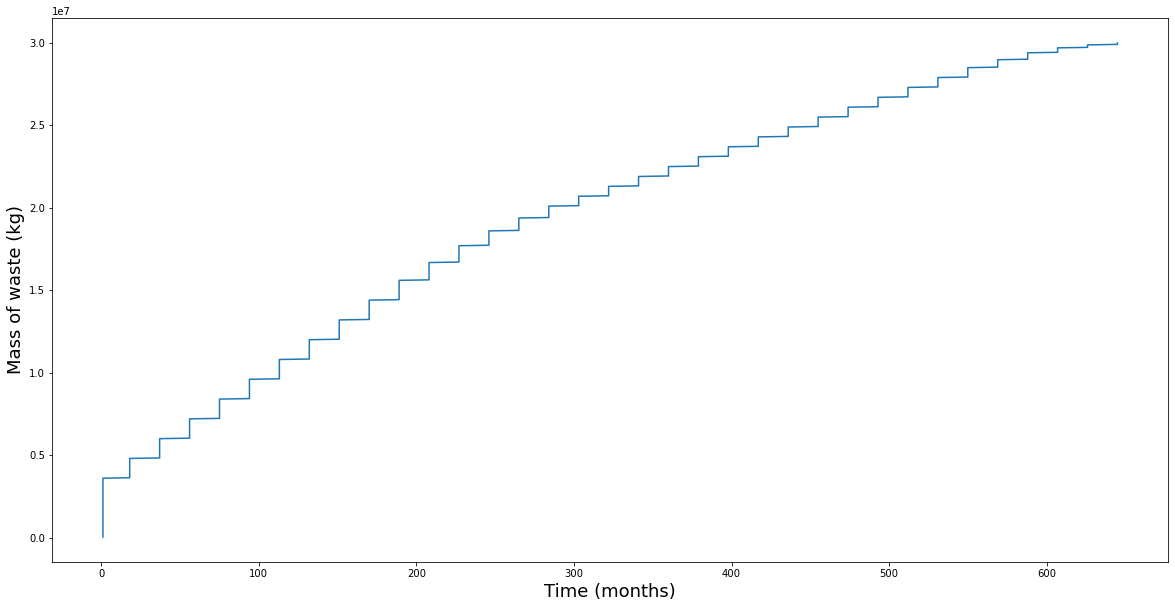

In [48]:
enriched_u[['Time','Quantity']].plot(x = 'Time', figsize=(20,10), legend=False)
plt.xlabel('Time (months)',fontsize=18); plt.ylabel('Mass of UOX fuel fabricated (kg)',fontsize=18)
plt.show()

### Now we can plot the amount of waste sent to the repository as a function of time

To do this, we must know the waste commodities in the simulation and the prototype Id of the nuclear repository. This simulation involves a full recycle of spent fuel (from both the LWR and FRW prototypes), so the only commodity going into the repository is the 'waste' commodity. 

In [44]:
waste = tq.loc[tq['Commodity'] == 'waste'] #finding transactions that involve waste
#waste['Quantity'] = waste['Quantity'].cumsum() #taking cumulative sum of waste

In [41]:
print(waste['Quantity'].to_string())

122     240072.992701
123     240072.992701
124     240072.992701
125     240072.992701
126     240072.992701
127     240072.992701
128     240072.992701
129     240072.992701
130     240072.992701
131     240072.992701
132     240072.992701
133     240072.992701
134     240072.992701
135     240072.992701
136     240072.992701
137     240072.992701
138     240072.992701
139     240072.992701
140     240072.992701
141     240072.992701
142     240072.992701
143     240072.992701
144     240072.992701
145     240072.992701
146     240072.992701
147     240072.992701
148     240072.992701
149     240072.992701
150     240072.992701
151     240072.992701
152     240072.992701
153     240072.992701
154     240072.992701
155     240072.992701
156     240072.992701
157     240072.992701
158     240072.992701
159     240072.992701
160     240072.992701
161     240072.992701
162     240072.992701
163     240072.992701
164     240072.992701
165     240072.992701
166     240072.992701
167     24

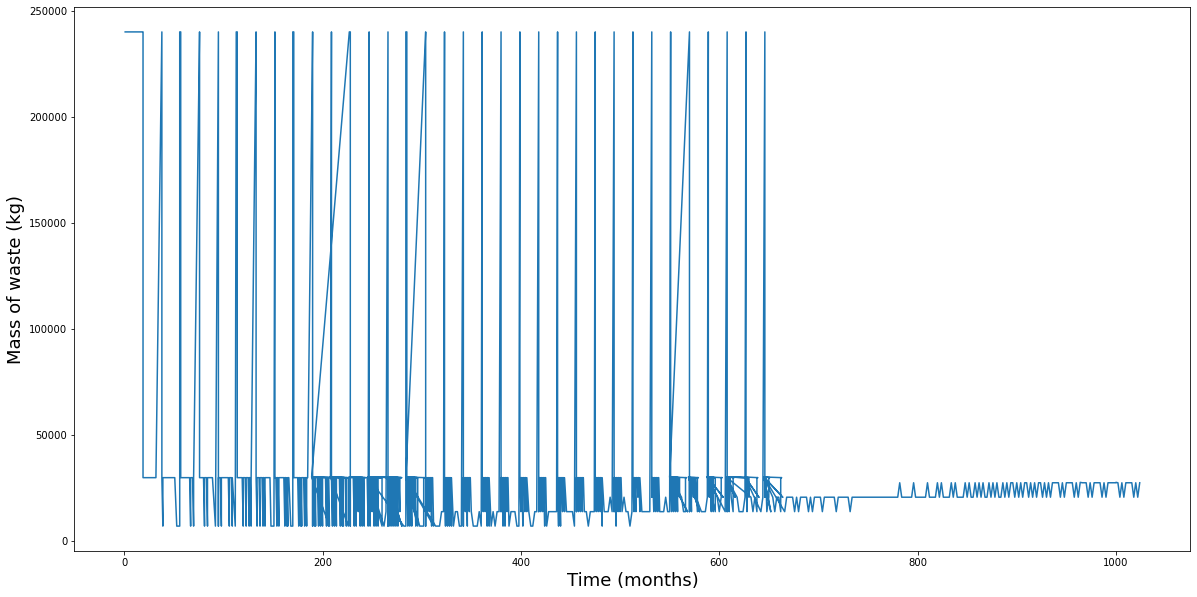

In [42]:
waste[['Time','Quantity']].plot(x = 'Time', figsize=(20,10), legend=False)
plt.xlabel('Time (months)',fontsize=18); plt.ylabel('Mass of waste (kg)',fontsize=18)
plt.show()